## Espectroscopia P2 
### Questão 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

algumas constantes físicas necessárias

In [2]:
kB = 1.38E-23 #constante de Boltzmann [J.K-1]
c = 2.9979E10 #velocidade da luz [cm/s]
h = 6.626E-34 #constante de Planck [J.s]

algumas funções

\begin{equation}
E = WN.c.h
\end{equation}

\begin{equation}
I(l,t) = (2l+1)exp[-hcBl(l+1)/k_B T]
\end{equation}

R-branch ($l=0,1,2,...$) [com a correção do efeito centrifugal]:
\begin{equation}
WN _R(l) = WN _0+2B(l+1) - 4D(l+1)^3
\end{equation}

P-branch ($l=1,2,...$):
\begin{equation}
WN _P(l) = WN _0-2Bl
\end{equation}

In [3]:
'''
E(WN)

parâmetros
WN: número de onda [cm-1]

retorna
E: energia respectiva ao número de onda [j]
'''
def E(WN):
    return WN*c*h


'''
I(l,T)

parâmetros
l: número quântico orbital (número natural)
T: temperatura [K]

retorna
I: intesidade associada ao l p/ a temperatura T
'''
def I(l,T): #intensidade p/ cada l
    return (2*l+1)*np.exp(-h*c*B*l*(l+1)/kB/T)

'''
WN_R(l,NW0)

parâmetros
l: número quântico orbital (número natural)
WN0: número de onda da linha central [cm-1]

retorna
WN_R: número de onda (no branch-R) respectivo ao l
'''
def WN_R(l, WN0):
    return WN0 + 2*B*(l+1) - 4*D*(l+1)**3

'''
WN_P(l,NW0)

parâmetros
l: número quântico orbital (número natural)
WN0: número de onda da linha central [cm-1]

retorna
WN_P: número de onda (no branch-P) respectivo ao l
'''
def WN_P(l, WN0):
    return WN0 - 2*B*l #+ 4*D*l**3

In [4]:
'''
vibrational_rotational(n_linhas_R, n_linhas_P, T)

parametros
n_linhas_R: número de linhas desejadas do R-branch
n_linhas_P: número de linhas desejadas do P-branch
T: temperatura [K]

retorna
WN_R_branch: números de onda das linhas do R-branch [cm-1]
I_R_branch: intensidades das linhas do R-branch
WN_P_branch: números de onda das linhas do P-branch [cm-1]
I_P_branch: intensidades das linhas do P-branch
'''
def vibrational_rotational(n_linhas_R, n_linhas_P, T):
    
    #R-branch
    WN_R_branch = np.zeros(n_linhas_R)
    I_R_branch = np.zeros(n_linhas_R)
    for i in range(n_linhas_R):
        WN_R_branch[i] = WN_R(i,WN0)   
        I_R_branch[i] = I(i+1,T)
    
    #P-branch
    WN_P_branch = np.zeros(n_linhas_P)
    I_P_branch = np.zeros(n_linhas_P)
    for i in range(n_linhas_P):
        WN_P_branch[i] = WN_P(i+1,WN0) 
        I_P_branch[i] = I(i+1,T)
    
    return WN_R_branch, I_R_branch, WN_P_branch, I_P_branch

'''
plot(WN_R_branch, I_R_branch, WN_P_branch, I_P_branch)

parametros
WN_R_branch: números de onda das linhas do R-branch
I_R_branch: intensidades das linhas do R-branch
WN_P_branch: números de onda das linhas do P-branch
I_P_branch: intensidades das linhas do P-branch

retorna
plot do espectro vibracional-rotacional
'''
def plot(WN_R_branch, I_R_branch, WN_P_branch, I_P_branch):
    
    #plotting R-branch
    for i in range(len(WN_R_branch)):
        plt.vlines(WN_R_branch[i], 0, I_R_branch[i],color='b')
    
    #plotting P-branch
    for i in range(len(WN_P_branch)):       
        plt.vlines(WN_P_branch[i], 0, I_P_branch[i],color='g')
    
    #plotting WN0 position
    plt.vlines(WN0, 0, np.max(I_R_branch)*1.3,linestyle='--', color='k')
    
    plt.title('espectro vibracional-rotacional ('+str(molecule)+', T='+str(T)+'K)')
    plt.ylabel('intensidade')
    plt.xlabel('número de onda [cm-1]')
    plt.ylim(0,np.max(I_P_branch)*1.3)
    plt.xlim(WN_P_branch[-1]-B,WN_R_branch[-1]+B)
    plt.grid()
    
    return

a) molécula HBr, T=100K

,nº de onda (R-branch) [cm$^{-1}$],Intensidade (R-branch),nº de onda (P-branch) [cm$^{-1}$],Intensidade (P-branch)
0,2575.198552,2.355584e+00,2541.6,2.355584e+00
1,2591.988416,2.420483e+00,2524.8,2.420483e+00
2,2608.760904,1.640446e+00,2508.0,1.640446e+00
3,2625.507328,8.017071e-01,2491.2,8.017071e-01
4,2642.219000,2.924506e-01,2474.4,2.924506e-01
5,2658.887232,8.099667e-02,2457.6,8.099667e-02
6,2675.503336,1.719714e-02,2440.8,1.719714e-02
7,2692.058624,2.816000e-03,2424.0,2.816000e-03
8,2708.544408,3.570534e-04,2407.2,3.570534e-04
9,2724.952000,3.515379e-05,2390.4,3.515379e-05


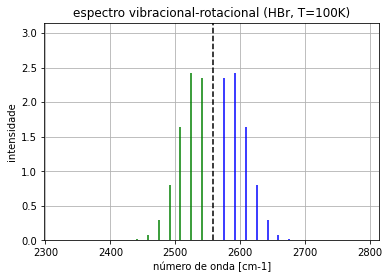

In [5]:
molecule = 'HBr'
B = 8.4 #constante rotacional [cm-1]
D = 0.000362 #[cm-1]
WN0 = 2558.4 #número de onda da linha central [cm-1] (não visível p/ moléculas lineares)

T=100 #temperatura [K]
plot(*vibrational_rotational(15, 15, T))
pd.DataFrame(np.array(vibrational_rotational(15, 15, T)).T, columns=['nº de onda (R-branch) [cm$^{-1}$]',
                                                                     'Intensidade (R-branch)',
                                                                     'nº de onda (P-branch) [cm$^{-1}$]',
                                                                     'Intensidade (P-branch)'])

b) molécula HBr, T=1000K

,nº de onda (R-branch) [cm$^{-1}$],Intensidade (R-branch),nº de onda (P-branch) [cm$^{-1}$],Intensidade (P-branch)
0,2575.198552,2.928323,2541.6,2.928323
1,2591.988416,4.650110,2524.8,4.650110
2,2608.760904,6.054586,2508.0,6.054586
3,2625.507328,7.066752,2491.2,7.066752
4,2642.219000,7.653475,2474.4,7.653475
5,2658.887232,7.823404,2457.6,7.823404
6,2675.503336,7.621277,2440.8,7.621277
7,2692.058624,7.118152,2424.0,7.118152
8,2708.544408,6.399581,2407.2,6.399581
9,2724.952000,5.553856,2390.4,5.553856


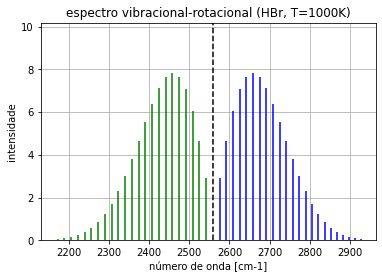

In [6]:
molecule = 'HBr'
B = 8.4 #constante rotacional [cm-1]
D = 0.000362 #[cm-1]
WN0 = 2558.4 #número de onda da linha central [cm-1] (não visível p/ moléculas lineares)

T=1000 #temperatura [K]
plot(*vibrational_rotational(25, 25, T))
pd.DataFrame(np.array(vibrational_rotational(25, 25, T)).T, columns=['nº de onda (R-branch) [cm$^{-1}$]',
                                                                     'Intensidade (R-branch)',
                                                                     'nº de onda (P-branch) [cm$^{-1}$]',
                                                                     'Intensidade (P-branch)'])

distância entre cada par de linhas p/ R-branch [cm-1]

(note que a distância vai diminuindo)

In [7]:
vibrational_rotational(25, 25, T)[0][1:] - vibrational_rotational(25, 25, T)[0][:-1]

array([16.789864, 16.772488, 16.746424, 16.711672, 16.668232, 16.616104,
       16.555288, 16.485784, 16.407592, 16.320712, 16.225144, 16.120888,
       16.007944, 15.886312, 15.755992, 15.616984, 15.469288, 15.312904,
       15.147832, 14.974072, 14.791624, 14.600488, 14.400664, 14.192152])

### Questão 2

#### Vibracional-Rotacional

a) molécula H2

,nº de onda (R-branch) [cm$^{-1}$],Intensidade (R-branch),nº de onda (P-branch) [cm$^{-1}$],Intensidade (P-branch)
0,4265.07848,1.686167e+00,4025.12,1.686167e+00
1,4383.74784,8.877852e-01,3905.04,8.877852e-01
2,4499.99896,2.206855e-01,3784.96,2.206855e-01
3,4612.62272,2.831624e-02,3664.88,2.831624e-02
4,4720.41000,1.941254e-03,3544.80,1.941254e-03
5,4822.15168,7.232839e-05,3424.72,7.232839e-05
6,4916.63864,1.478808e-06,3304.64,1.478808e-06
7,5002.66176,1.669183e-08,3184.56,1.669183e-08


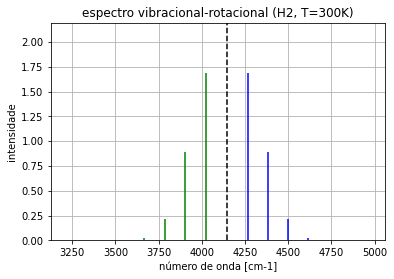

In [8]:
molecule='H2'
B = 60.04 #constante rotacional [cm-1]
D = 0.05038 #[cm-1]
WN0 = 4145.2 #número de onda da linha central [cm-1] (não visível p/ moléculas lineares)

T=300 #temperatura [K]
plot(*vibrational_rotational(8, 8, T))
pd.DataFrame(np.array(vibrational_rotational(8, 8, T)).T, columns=['nº de onda (R-branch) [cm$^{-1}$]',
                                                                     'Intensidade (R-branch)',
                                                                     'nº de onda (P-branch) [cm$^{-1}$]',
                                                                     'Intensidade (P-branch)'])

b) molécula HD (hidrogênio-deutério)

,nº de onda (R-branch) [cm$^{-1}$],Intensidade (R-branch),nº de onda (P-branch) [cm$^{-1}$],Intensidade (P-branch)
0,3681.75612,1.935108,3499.12,1.935108
1,3772.26896,1.341905,3407.74,1.341905
2,3861.29524,0.504198,3316.36,0.504198
3,3948.09168,0.112223,3224.98,0.112223
4,4031.91500,0.015316,3133.60,0.015316
5,4112.02192,0.001304,3042.22,0.001304
6,4187.66916,0.000070,2950.84,0.000070
7,4258.11344,0.000002,2859.46,0.000002


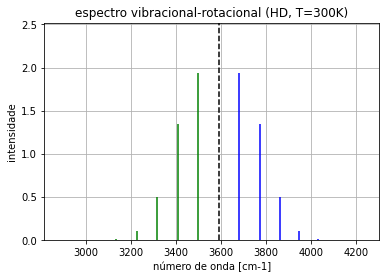

In [9]:
molecule='HD'
B = 45.69 #constante rotacional [cm-1]
D = 0.03097 #[cm-1]
WN0 = 3590.5 #número de onda da linha central [cm-1] (não visível p/ moléculas lineares)

T=300 #temperatura [K]
plot(*vibrational_rotational(8, 8, T))
pd.DataFrame(np.array(vibrational_rotational(8, 8, T)).T, columns=['nº de onda (R-branch) [cm$^{-1}$]',
                                                                     'Intensidade (R-branch)',
                                                                     'nº de onda (P-branch) [cm$^{-1}$]',
                                                                     'Intensidade (P-branch)'])

#### Raman Rotacional

S-branch ($l=0,1,2,...$):
\begin{equation}
WN_S(l) = WN_0 + 6B + 4Bl
\end{equation}

O-branch ($l=2,3,4,...$):
\begin{equation}
WN_O(l) = WN_0 + 2B - 4Bl
\end{equation}

In [10]:
'''
WN_S(l,NW0)

parâmetros
l: número quântico orbital (número natural)
WN0: número de onda da linha central [cm-1]

retorna
WN_S: número de onda (no branch-S) respectivo ao l
'''
def WN_S(l, WN0):
    return WN0 + 6*B + 4*B*l

'''
WN_O(l,NW0)

parâmetros
l: número quântico orbital (número natural)
WN0: número de onda da linha central [cm-1]

retorna
WN_O: número de onda (no branch-O) respectivo ao l
'''
def WN_O(l, WN0):
    return WN0 + 2*B - 4*B*l

'''
WN_Q(l,NW0)

parâmetros
l: número quântico orbital (número natural)
WN0: número de onda da linha central [cm-1]

retorna
WN_Q: número de onda (no branch-Q) respectivo ao l
'''
def WN_Q(l, WN0):
    return WN0

In [11]:
'''
rotational_Raman(n_linhas_S, n_linhas_O, n_linhas_Q, T)

parametros
n_linhas_S: número de linhas desejadas do S-branch
n_linhas_O: número de linhas desejadas do O-branch
n_linhas_Q: número de linhas desejadas do Q-branch
T: temperatura [K]

retorna
WN_S_branch: números de onda das linhas do S-branch [cm-1]
I_S_branch: intensidades das linhas do S-branch
WN_O_branch: números de onda das linhas do O-branch [cm-1]
I_O_branch: intensidades das linhas do O-branch
WN_Q_branch: números de onda das linhas do Q-branch [cm-1]
I_Q_branch: intensidades das linhas do Q-branch
'''
def rotational_Raman(n_linhas_S, n_linhas_O, n_linhas_Q, T):
    
    #S-branch
    WN_S_branch = np.zeros(n_linhas_S)
    I_S_branch = np.zeros(n_linhas_S)
    for i in range(n_linhas_S):
        WN_S_branch[i] = WN_S(i,WN0)   
        I_S_branch[i] = I(i+2,T)
    
    #O-branch
    WN_O_branch = np.zeros(n_linhas_O)
    I_O_branch = np.zeros(n_linhas_O)
    for i in range(2,n_linhas_O+2):
        WN_O_branch[i-2] = WN_O(i,WN0) 
        I_O_branch[i-2] = I(i,T)
        
    #Q-branch
    WN_Q_branch = np.zeros(n_linhas_Q)
    I_Q_branch = np.zeros(n_linhas_Q)
    for i in range(n_linhas_O):
        WN_Q_branch[i] = WN_Q(i,WN0) 
        I_Q_branch[i] = I(i,T)
    
    return WN_S_branch, I_S_branch, WN_O_branch, I_O_branch, WN_Q_branch, I_Q_branch

'''
plot_RR(WN_S_branch, I_S_branch, WN_O_branch, I_O_branch, WN_Q_branch, I_Q_branch)

parametros
WN_S_branch: números de onda das linhas do S-branch [cm-1]
I_S_branch: intensidades das linhas do S-branch
WN_O_branch: números de onda das linhas do O-branch [cm-1]
I_O_branch: intensidades das linhas do O-branch
WN_Q_branch: números de onda das linhas do Q-branch [cm-1]
I_Q_branch: intensidades das linhas do Q-branch

retorna
plot do espectro Raman rotacional
'''
def plot_RR(WN_S_branch, I_S_branch, WN_O_branch, I_O_branch, WN_Q_branch, I_Q_branch):
    
    #plotting S-branch
    for i in range(len(WN_S_branch)):
        plt.vlines(WN_S_branch[i], 0, I_S_branch[i],color='b')
    
    #plotting O-branch
    for i in range(len(WN_O_branch)):       
        plt.vlines(WN_O_branch[i], 0, I_O_branch[i],color='g')
        
    #plotting Q-branch
    for i in range(len(WN_Q_branch)):       
        plt.vlines(WN_Q_branch[i], 0, I_Q_branch[i],color='r')    
    
    #plotting WN0 position
    plt.vlines(WN0, 0, np.max(I_Q_branch)*1.3,linestyle=':', color='k')
    
    plt.title('espectro Raman rotacional ('+str(molecule)+', T='+str(T)+'K)')
    plt.ylabel('intensidade')
    plt.xlabel('número de onda [cm-1]')
    plt.ylim(0,np.max(I_Q_branch)*1.3)
    plt.xlim(WN_O_branch[-1]-B,WN_S_branch[-1]+B)
    plt.grid()
    
    return

a) molécula H2, T=300K

,nº de onda (S-branch) [cm$^{-1}$],Intensidade (S-branch),nº de onda (O-branch) [cm$^{-1}$],Intensidade (O-branch),nº de onda (Q-branch) [cm$^{-1}$],Intensidade (Q-branch)
0,4505.44,8.877852e-01,3784.96,8.877852e-01,4145.2,1.000000e+00
1,4745.60,2.206855e-01,3544.80,2.206855e-01,4145.2,1.686167e+00
2,4985.76,2.831624e-02,3304.64,2.831624e-02,4145.2,8.877852e-01
3,5225.92,1.941254e-03,3064.48,1.941254e-03,4145.2,2.206855e-01
4,5466.08,7.232839e-05,2824.32,7.232839e-05,4145.2,2.831624e-02
5,5706.24,1.478808e-06,2584.16,1.478808e-06,4145.2,1.941254e-03
6,5946.40,1.669183e-08,2344.00,1.669183e-08,4145.2,7.232839e-05
7,6186.56,1.044293e-10,2103.84,1.044293e-10,4145.2,1.478808e-06
8,6426.72,3.631459e-13,1863.68,3.631459e-13,4145.2,1.669183e-08
9,6666.88,7.033348e-16,1623.52,7.033348e-16,4145.2,1.044293e-10


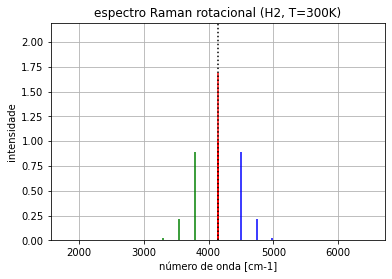

In [12]:
molecule='H2'
B = 60.04 #constante rotacional [cm-1]
D = 0.05038 #[cm-1]
WN0 = 4145.2  #número de onda da linha central [cm-1] (visível p/ moléculas lineares)

T=300 #temperatura
plot_RR(*rotational_Raman(10, 10, 10, T))
pd.DataFrame(np.array(rotational_Raman(10, 10, 10, T)).T, columns=['nº de onda (S-branch) [cm$^{-1}$]',
                                                                     'Intensidade (S-branch)',
                                                                     'nº de onda (O-branch) [cm$^{-1}$]',
                                                                     'Intensidade (O-branch)',
                                                                     'nº de onda (Q-branch) [cm$^{-1}$]',
                                                                     'Intensidade (Q-branch)'])

distância entre as linhas do S-branch sempre igual a 4B

In [13]:
np.abs(rotational_Raman(10, 10, 10, T)[0][1:]-rotational_Raman(10, 10, 10, T)[0][:-1])/B

array([4., 4., 4., 4., 4., 4., 4., 4., 4.])

distância entre as linhas do O-branch sempre igual a 4B

In [14]:
np.abs(rotational_Raman(10, 10, 10, T)[2][1:]-rotational_Raman(10, 10, 10, T)[2][:-1])/B

array([4., 4., 4., 4., 4., 4., 4., 4., 4.])

distância entre a primeira linha do S-branch e a primeira linha do O-branch igual a 12B

In [15]:
(rotational_Raman(10, 10, 10, T)[0][0]-rotational_Raman(10, 10, 10, T)[2][0])/B

12.0

b) molécula HD (hidrogênio-deutério), T=300K

,nº de onda (S-branch) [cm$^{-1}$],Intensidade (S-branch),nº de onda (O-branch) [cm$^{-1}$],Intensidade (O-branch),nº de onda (Q-branch) [cm$^{-1}$],Intensidade (Q-branch)
0,3864.64,1.341905e+00,3316.36,1.341905e+00,3590.5,1.000000e+00
1,4047.40,5.041983e-01,3133.60,5.041983e-01,3590.5,1.935108e+00
2,4230.16,1.122229e-01,2950.84,1.122229e-01,3590.5,1.341905e+00
3,4412.92,1.531620e-02,2768.08,1.531620e-02,3590.5,5.041983e-01
4,4595.68,1.303782e-03,2585.32,1.303782e-03,3590.5,1.122229e-01
5,4778.44,6.989403e-05,2402.56,6.989403e-05,3590.5,1.531620e-02
6,4961.20,2.373935e-06,2219.80,2.373935e-06,3590.5,1.303782e-03
7,5143.96,5.128950e-08,2037.04,5.128950e-08,3590.5,6.989403e-05
8,5326.72,7.068594e-10,1854.28,7.068594e-10,3590.5,2.373935e-06
9,5509.48,6.226791e-12,1671.52,6.226791e-12,3590.5,5.128950e-08


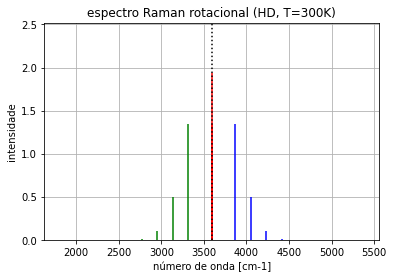

In [16]:
molecule='HD'
B = 45.69 #constante rotacional [cm-1]
D = 0.03097 #[cm-1]
WN0 = 3590.5 #número de onda da linha central [cm-1] (visível p/ moléculas lineares)

T=300 #temperatura
plot_RR(*rotational_Raman(10, 10, 10, T))
pd.DataFrame(np.array(rotational_Raman(10, 10, 10, T)).T, columns=['nº de onda (S-branch) [cm$^{-1}$]',
                                                                     'Intensidade (S-branch)',
                                                                     'nº de onda (O-branch) [cm$^{-1}$]',
                                                                     'Intensidade (O-branch)',
                                                                     'nº de onda (Q-branch) [cm$^{-1}$]',
                                                                     'Intensidade (Q-branch)'])

### Questão 4

campo forte (low-spin)

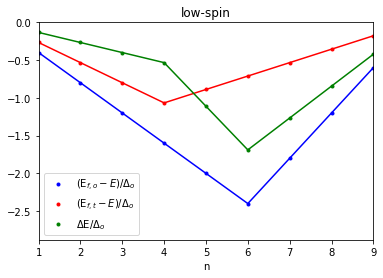

In [17]:
n = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
octa = np.array([-2/5, -4/5, -6/5, -8/5, -2, -12/5, -9/5, -6/5, -3/5])
tetra = np.array([-4/15, -8/15, -4/5, -16/15, -40/45, -32/45, -8/15, -16/45, -8/45])
delta = np.array([-2/15, -4/15, -2/5, -8/15, -10/9, -76/45, -19/15, -38/45, -19/45])

plt.plot(n, octa, '.b', label='(E$_{f,o}-E$)/$\Delta_o$')
plt.plot(n, octa, 'b')
plt.plot(n, tetra, '.r', label='(E$_{f,t}-E$)/$\Delta_o$')
plt.plot(n, tetra, 'r')
plt.plot(n, delta, '.g', label='$\Delta$E/$\Delta_o$')
plt.plot(n, delta, 'g')
plt.ylim(np.min(octa)*1.2,0)
plt.xlim(n[0],n[-1])
plt.xlabel('n')
plt.title('low-spin')
plt.legend()

[extra] campo fraco (high-spin)

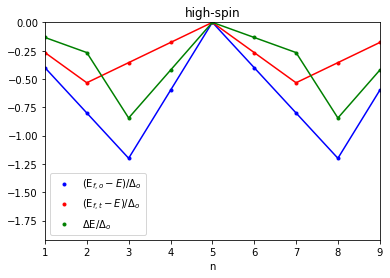

In [18]:
n = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
octa = np.array([-2/5, -4/5, -6/5, -3/5, 0, -2/5, -4/5, -6/5, -3/5])
tetra = np.array([-4/15, -8/15, -16/45, -8/45, 0, -4/15, -8/15, -16/45, -8/45])
delta = np.array([-2/15, -4/15, -38/45, -19/45, 0, -2/15, -4/15, -38/45, -19/45])

plt.plot(n, octa, '.b', label='(E$_{f,o}-E$)/$\Delta_o$')
plt.plot(n, octa, 'b')
plt.plot(n, tetra, '.r', label='(E$_{f,t}-E$)/$\Delta_o$')
plt.plot(n, tetra, 'r')
plt.plot(n, delta, '.g', label='$\Delta$E/$\Delta_o$')
plt.plot(n, delta, 'g')
plt.ylim(np.min(octa)*1.6,0)
plt.xlim(n[0],n[-1])
plt.xlabel('n')
plt.title('high-spin')
plt.legend()